In [14]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess as sp
import time
import multiprocessing as mp
import random
colors = "rgbcmykw"
getVals = lambda x: list(dict(x).values())
getKeys = lambda x: list(dict(x).keys())

In [56]:
def failures(G):
    G = G.copy()
    size = len(G.nodes)
    fractionRemoved = []
    fractionLargest = []
    
    nSteps = np.int32(np.linspace(1, int(0.99*size), num=20))
    removalsPerStep = np.append([0], np.diff(nSteps)) # First run performs no removals

    for n, removals in zip(nSteps, removalsPerStep):
        print(n, end=" ")
        
        for i in range(removals):
            node = random.choice(list(G.nodes))
            G.remove_node(node) 
        
        largest = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
        
        fractionLargest.append(len(largest.nodes)/size) #store the size of the largest component
        fractionRemoved.append(n/size)

    return np.array(fractionLargest), np.array(fractionRemoved)

def failuresAverage(graph_generator, repeat=10):
    allLarg = None
    allRem  = None
    
    for i in range(repeat):
        larg, rem = failures(graph_generator())
        
        if allLarg is None:
            allLarg = larg
            allRem = rem
        else:
            allLarg = allLarg + larg
            allRem  = allRem + rem
    
    return allLarg / repeat, allRem / repeat


result = failuresAverage(lambda: nx.erdos_renyi_graph(1000, 0.001))

1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 1 53 105 157 209 261 313 365 417 469 521 573 625 677 729 781 833 885 937 990 

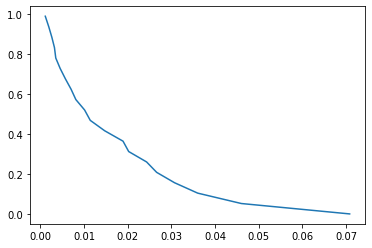

In [58]:
plt.plot(result[0], result[1])